Menggunakan kode yang sama dengan contoh image compression di Scele, kita akan membuktikannya dengan membandingkan file size gambar yang asli dengan yang sudah dicompress

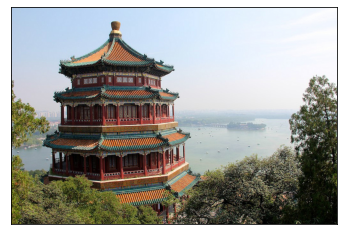

In [0]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Tidak bisa karena RGBA, sehingga menghasilkan shape yang berbentuk (M,N,4)...
# img = mpimg.imread('gambar-asli.png') 

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])

ax.imshow(china);

In [0]:
china.shape

(427, 640, 3)

In [0]:
plt.savefig("china.jpg")

<Figure size 432x288 with 0 Axes>

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [0]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [0]:
import numpy as np

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

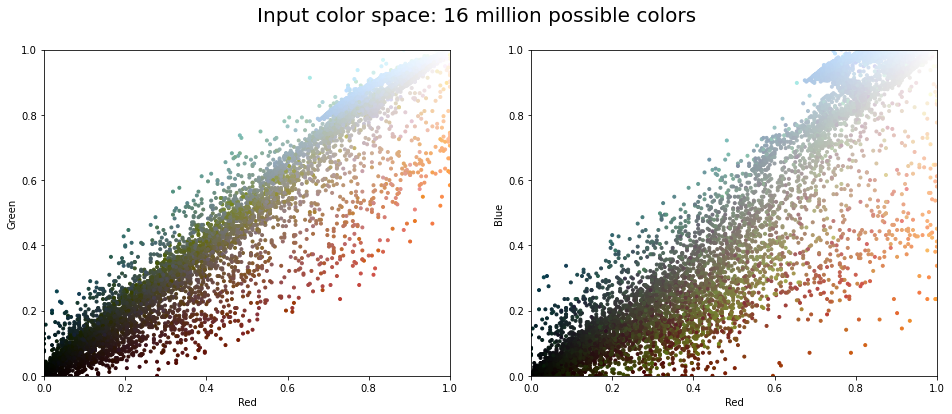

In [0]:
plot_pixels(data, title='Input color space: 16 million possible colors')


Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

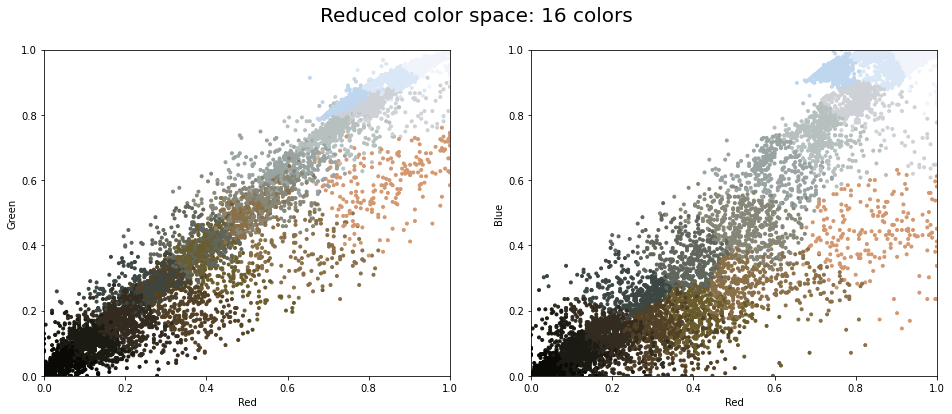

In [0]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
#new_colors = 
new_colors = np.asarray(kmeans.cluster_centers_[kmeans.predict(data)])

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

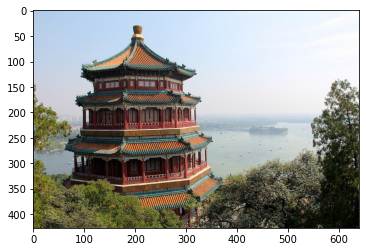

In [27]:
china_recolored = new_colors.reshape(china.shape)
from google.colab import files

# Gambar asli
plt.figure()
plt.imshow(china) 
fig.savefig("gambar-asli.jpg")
files.download('gambar-asli.jpg')
plt.show()  


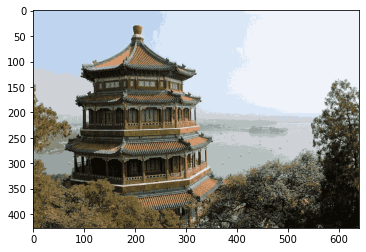

In [24]:
plt.figure()
plt.imshow(china_recolored) 
plt.show()  
fig.savefig("gambar-compressed.jpg")
files.download('gambar-compressed.jpg')

Setelah didownload, kita dapat melihat bahwa gambar yang sudah dicompress memiliki file size yang lebih kecil dari aslinya.